In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [3]:
root = 'culane/'
label_root = root + 'laneseg_label'
train = root + 'list/train_copy.txt'
test =  root + 'list/test_copy.txt'

test_path = '/driver_182_30frame/06011143_0165.MP4/00030.jpg'
file_root = '00155'
path_mask = root + 'laneseg_label/driver_37_30frame/05191535_0475.MP4/' + file_root + '.png'
lines = root + 'driver_37_30frame/05191535_0475.MP4/' + file_root + '.lines.txt'
path = root + 'driver_37_30frame/05191535_0475.MP4/' + file_root + '.jpg'

In [4]:
#img = open_image(path)
#mask = open_mask(path_mask)

In [5]:
def get_y_fn(path):
    return label_root + path[:-3] + 'png'
get_y_fn(test_path)

'culane/laneseg_label/driver_182_30frame/06011143_0165.MP4/00030.png'

In [6]:
def get_path_x_fn(path):
    return root + path[1:]
get_path_x_fn(test_path)

'culane/driver_182_30frame/06011143_0165.MP4/00030.jpg'

In [7]:
def show_masked(img_path, mask_path):
    img = open_image(img_path)
    mask = open_mask(mask_path, div=False)
    _,axs = plt.subplots(1,3, figsize=(8,4))
    img.show(ax=axs[0], title='no mask')
    img.show(ax=axs[1], y=mask, title='masked')
    mask.show(ax=axs[2], title='mask only', alpha=1.)


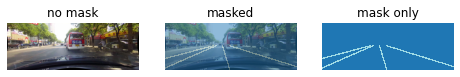

In [8]:

show_masked(path, path_mask)

In [9]:
free = gpu_mem_get_free_no_cache()


In [10]:
train_df = pd.read_csv(train, header=None); 
train_df = train_df.set_axis(['path'], axis=1, inplace=False)
train_df['label'] = train_df['path'].apply(get_y_fn); train_df

train_df['path'] = train_df['path'].apply(get_path_x_fn);
train_df['is_valid'] = False
train_df.to_csv('train.csv')


In [11]:
test_df = pd.read_csv(test, header=None)
test_df = test_df.set_axis(['path'], axis=1, inplace=False)

test_df['label'] = test_df['path'].apply(get_y_fn)
test_df['path'] = test_df['path'].apply(get_path_x_fn)
test_df['is_valid'] = True
test_df.to_csv('test.csv')
test_df.head

<bound method NDFrame.head of                                                    path  \
0     culane/driver_37_30frame/05181432_0203.MP4/000...   
1     culane/driver_37_30frame/05181432_0203.MP4/000...   
2     culane/driver_37_30frame/05181432_0203.MP4/000...   
3     culane/driver_37_30frame/05181432_0203.MP4/000...   
4     culane/driver_37_30frame/05181432_0203.MP4/001...   
...                                                 ...   
3352  culane/driver_37_30frame/05191714_0507.MP4/052...   
3353  culane/driver_37_30frame/05191714_0507.MP4/052...   
3354  culane/driver_37_30frame/05191714_0507.MP4/053...   
3355  culane/driver_37_30frame/05191714_0507.MP4/053...   
3356  culane/driver_37_30frame/05191714_0507.MP4/053...   

                                                  label  is_valid  
0     culane/laneseg_label/driver_37_30frame/0518143...      True  
1     culane/laneseg_label/driver_37_30frame/0518143...      True  
2     culane/laneseg_label/driver_37_30frame/0518143...  

In [12]:
total_df = pd.concat([test_df, train_df]); total_df

total_df.to_csv('check.csv')

culane/driver_182_30frame/06010516_0037.MP4/01200.jpg culane/laneseg_label/driver_182_30frame/06010516_0037.MP4/01200.png


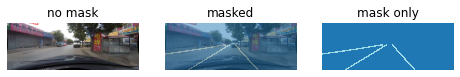

In [13]:

#print(total_df.iloc[,2])
row_num = np.random.randint(0, total_df.shape[0],1)
print(total_df.iloc[row_num].values[0][0], total_df.iloc[row_num].values[0][1])

#img_arr = cv2.imread('driver_182_30frame/05312327_0001.MP4/00300.png')
#np.unique(img_arr)
show_masked(total_df.iloc[row_num].values[0][0], total_df.iloc[row_num].values[0][1])

#test

print(df_names_to_idx(2, total_df.iloc[:]))
valid_idx = np.where(total_df.iloc[:,df_names_to_idx(2, total_df)])[0]
print(valid_idx)
mask = np.zeros(len(valid_idx[0]),dtype=bool)
mask[np.array(idxs)] = True
#print([(o[mask],o[~mask]) for o in valid_idx])

In [14]:
import re

def split(filename):
    print(filename)
    result = re.search("driver_37_30frame", filename);
    if result:
        return True
    else:
        return False
#split_by_valid_func(split)

In [15]:
class SegLabelListCustom(SegmentationLabelList):
        def open(self, fn): return open_mask(fn, div=True)

class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

In [16]:
src = (SegItemListCustom.from_df(path='', df=total_df, cols=0)
       .split_from_df(col=2)
        .label_from_df(cols=1, classes=np.array(['background','path']))
        ); src

LabelLists;

Train: LabelList (31411 items)
x: SegItemListCustom
Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640)
y: SegLabelListCustom
ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640)
Path: .;

Valid: LabelList (3357 items)
x: SegItemListCustom
Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640),Image (3, 590, 1640)
y: SegLabelListCustom
ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640),ImageSegment (1, 590, 1640)
Path: .;

Test: None

In [30]:
mask = open_mask(path)
size = np.array(mask.shape[1:])
size = size // 15
print(size)
#data = (src.transform(get_transforms(), size=size, tfm_y=True)
#        .databunch(bs=8)
#        .normalize(imagenet_stats))
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=4)
        .normalize(imagenet_stats))

[ 39 109]


In [ ]:
#data.show_batch(1, figsize=(10,7))

In [ ]:
#data.show_batch(10, figsize=(10,7), ds_type=DatasetType.Train)

In [31]:
wd=1e-2
metrics = partial(accuracy_thresh, thresh=0.2)
metrics = dice
#metrics=accuracy
# we use this as a segmentation measure probably wrong
def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [32]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [ ]:
#learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,dice,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


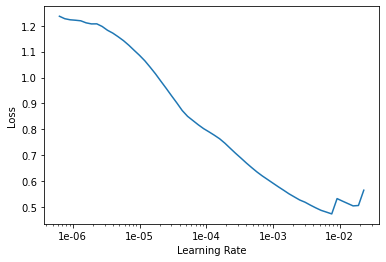

In [33]:
lr_find(learn)
learn.recorder.plot()

In [34]:
lr=3e-5
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,dice,time
0,350358592.000000,375115712.000000,0.062384,06:39
1,25542506496.000000,27678089216.000000,0.030140,06:29
2,12731001339904.000000,11799785111552.000000,0.030162,06:31
3,30457404063744.000000,26878045847552.000000,0.019973,06:38
4,167294579769344.000000,106767962865664.000000,0.072920,06:27
5,120691273760768.000000,160621559545856.000000,0.001409,06:25
6,101407826903040.000000,90606705573888.000000,0.076262,06:26
7,144516086497280.000000,170223244148736.000000,0.019219,06:27
8,226942766809088.000000,293433977602048.000000,0.090397,06:31
9,131752030896128.000000,135767212949504.000000,0.065402,06:20
